# **Project Report Link:** https://docs.google.com/document/d/1I8FDFqzUwQpmPDObNNobJl5-0pVPXdSLDVZ-TjTZYUA/edit?usp=sharing

In [ ]:
!pip install kagglehub


# 1. **Data loading/ Initial Inspection**

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/creditcardfraud


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix, classification_report,
                            precision_recall_curve, roc_curve,
                            auc, average_precision_score)
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

1.1 checking for class imbalance

In [ ]:
df['Class'].value_counts()

,count
Class,
0,284315
1,492


In [ ]:
print(f"Percentage of fraudulent transactions: {df['Class'].mean()*100:.4f}%")

Percentage of fraudulent transactions: 0.1727%


# **2. Data Cleaning**

2.1 Checking and dropping rows with missing values

In [ ]:
print(df.isnull().sum())

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


In [ ]:
df = df.dropna()

2.2 checking and droping duplicates rows

In [ ]:
duplicates = df.duplicated().sum()
print("No. of duplicate rows", duplicates)

No. of duplicate rows 1081


In [ ]:
df= df.drop_duplicates()

# **3. Feature Scaling**

In [ ]:
rob_scaler = RobustScaler()
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df = df.drop(['Amount','Time'], axis =1)

In [ ]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718,-0.995290
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530,-0.995290
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811,-0.995279
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487,-0.995279
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362,-0.995267


# **4. Feature Engineering**

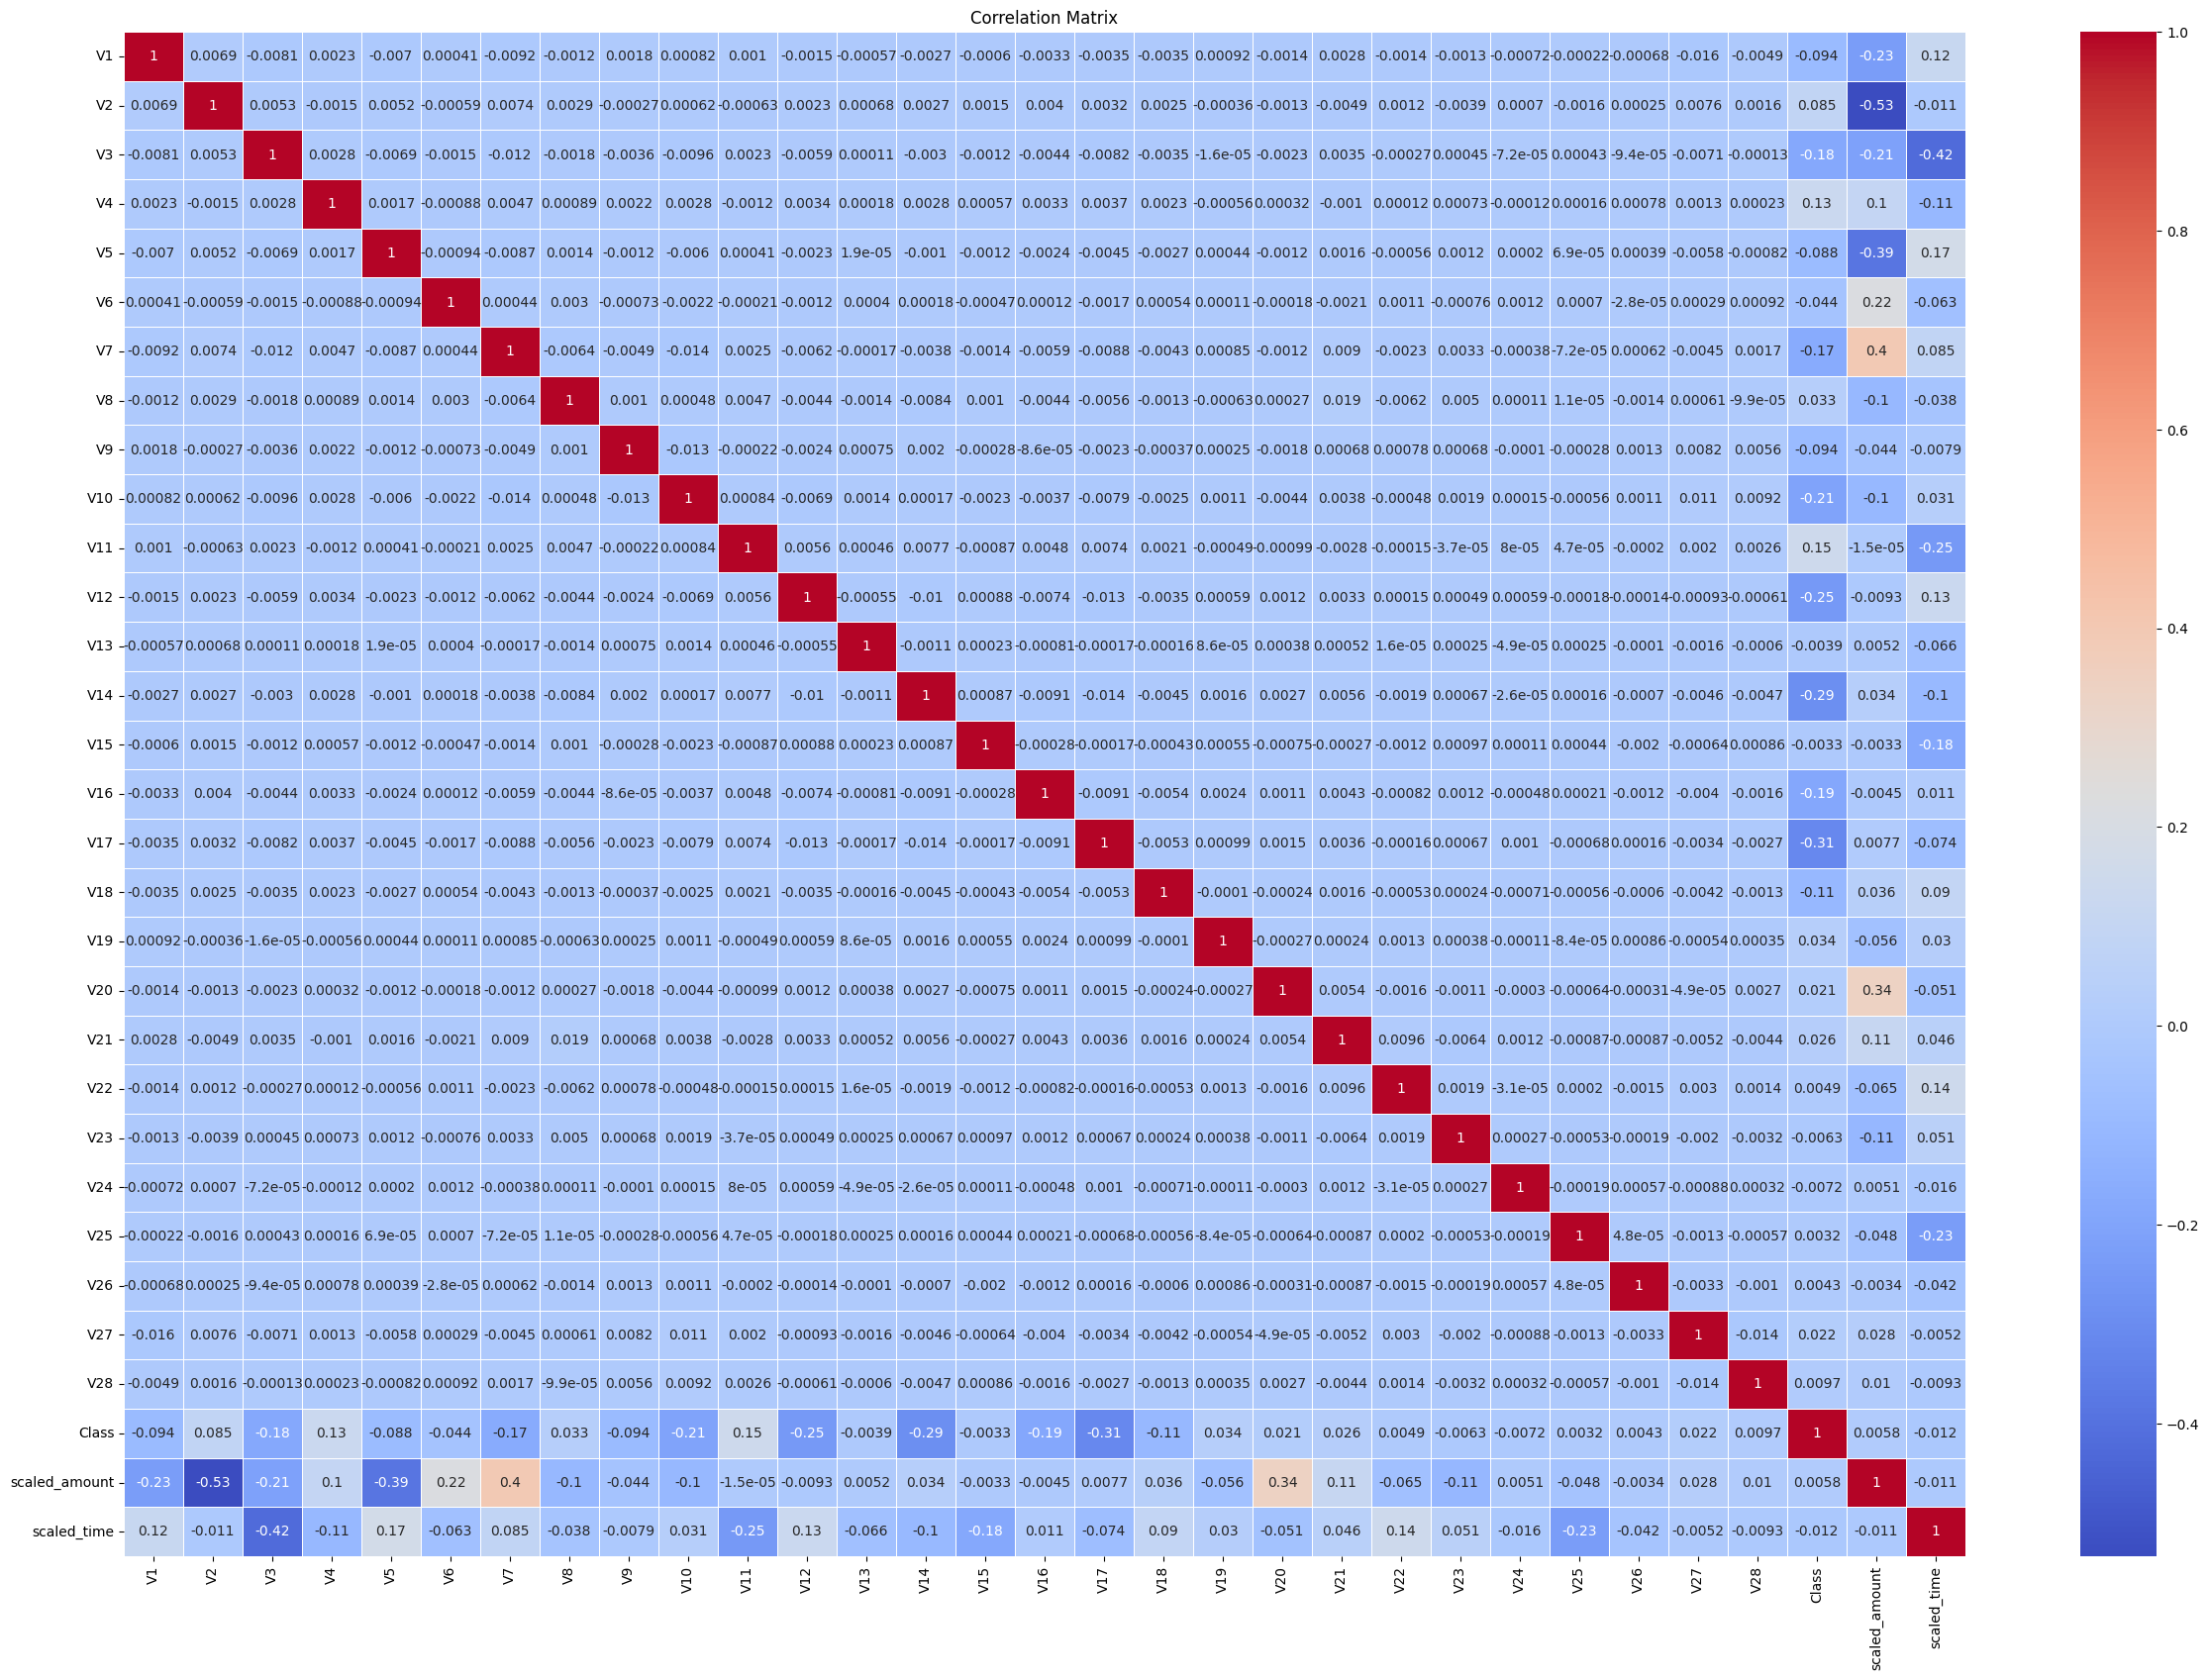

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(corr_matrix,annot = True,cmap='coolwarm', linewidths = 0.5)
plt.title("Correlation Matrix")
plt.show()

# **5. Data Splitting**

In [ ]:
x = df.drop('Class', axis=1)
y = df['Class']

In [ ]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 42 , stratify=y)

# **6. Handling Class Imbalance**

In [ ]:
smote = SMOTE(random_state = 42)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
print(f"Before SMOTE: {np.bincount(y_train)}")
print(f"After SMOTE : {np.bincount(y_train_smote)}")

Before SMOTE: [226602    378]
After SMOTE : [226602 226602]


# **7. Feature Importance Analysis**

In [ ]:
rf = RandomForestClassifier(random_state = 42)
rf.fit(x_train_smote,y_train_smote)


RandomForestClassifier(random_state=42)

In [ ]:
feature_importance = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance)

          Feature  Importance
13            V14    0.222420
9             V10    0.116170
16            V17    0.105252
3              V4    0.087231
11            V12    0.081035
10            V11    0.069922
2              V3    0.060732
15            V16    0.046405
1              V2    0.027708
6              V7    0.024387
7              V8    0.014955
8              V9    0.011966
26            V27    0.011110
18            V19    0.011057
17            V18    0.010715
20            V21    0.010667
28  scaled_amount    0.009792
4              V5    0.009529
0              V1    0.008794
12            V13    0.007680
19            V20    0.006881
25            V26    0.006489
14            V15    0.005665
27            V28    0.005602
5              V6    0.005496
22            V23    0.005035
29    scaled_time    0.004655
23            V24    0.004485
24            V25    0.004438
21            V22    0.003728


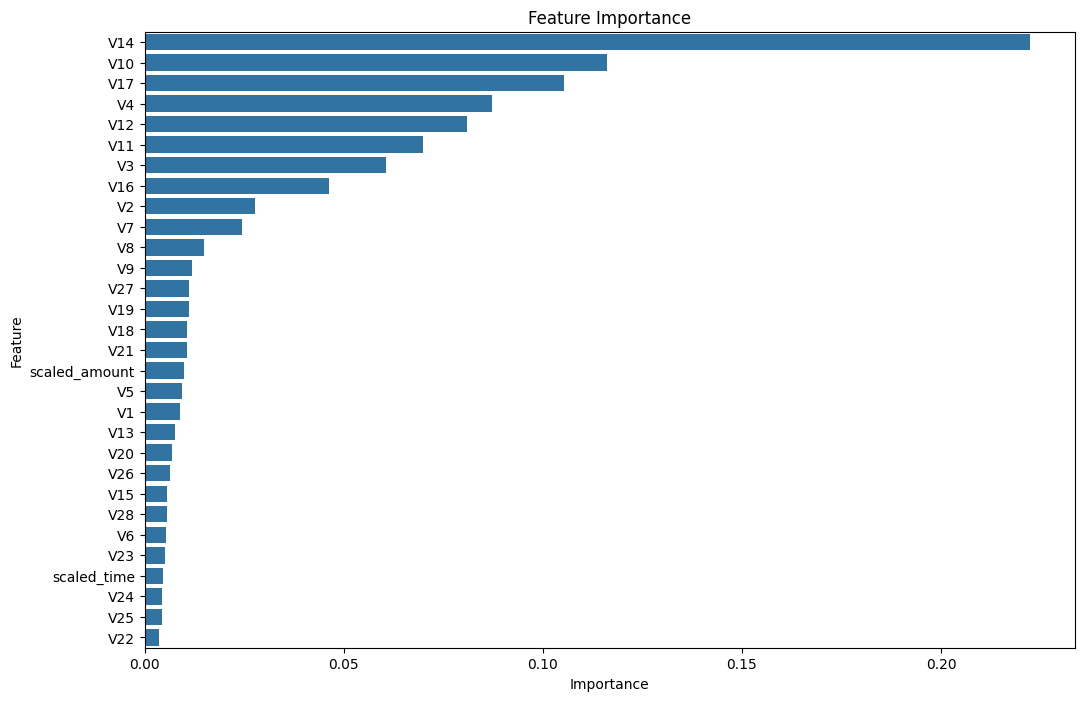

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


# **8. Final Dataset**

In [ ]:
x_train_final = x_train_smote
y_train_final = y_train_smote

print("Final training dataset shape:", x_train_final.shape)
print("Final training labels distribution:", np.bincount(y_train_final))
print("Final test dataset shape:", x_test.shape)
print("Final test labels distribution:", np.bincount(y_test))

Final training dataset shape: (453204, 30)
Final training labels distribution: [226602 226602]
Final test dataset shape: (56746, 30)
Final test labels distribution: [56651    95]


# **9. Model selection**

9.1 Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    class_weight='balanced',
    random_state=42
)
rf_model.fit(x_train_smote, y_train_smote)


RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)

In [ ]:
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'scale_pos_weight': [10, 50, 100]
}

9.2 xg boost with hypertuned parameters

In [ ]:
xgb_model = xgb.XGBClassifier(objective='binary:logistic', random_state=42)


In [ ]:
xgb_search = RandomizedSearchCV(
    xgb_model,
    param_grid,
    cv=3,
    scoring='recall',
    n_jobs=-1,
    random_state=42
)
xgb_search.fit(x_train_smote, y_train_smote)

/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7, 9],
                                        'n_estimators': [50, 100, 200],
                                        'scale_pos_weight': [10, 50, 100]},
                   random_state=42, scoring='recall')

In [ ]:
best_xgb = xgb_search.best_estimator_

9.3 Logistic Regression

In [ ]:
log_reg = LogisticRegression(
    C=0.1,
    class_weight='balanced',
    solver='liblinear',
    random_state=42
)

In [ ]:
log_reg.fit(x_train_smote, y_train_smote)

LogisticRegression(C=0.1, class_weight='balanced', random_state=42,
                   solver='liblinear')

# **10. Evaluation**

10.1 Metrics Analysis

In [ ]:
y_pred = rf_model.predict(x_test)
y_prob = rf_model.predict_proba(x_test)[:, 1]

In [ ]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[56593    58]
 [   19    76]]


In [ ]:
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56651
           1       0.57      0.80      0.66        95

    accuracy                           1.00     56746
   macro avg       0.78      0.90      0.83     56746
weighted avg       1.00      1.00      1.00     56746



In [ ]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_prob)
pr_auc = average_precision_score(y_test, y_prob)

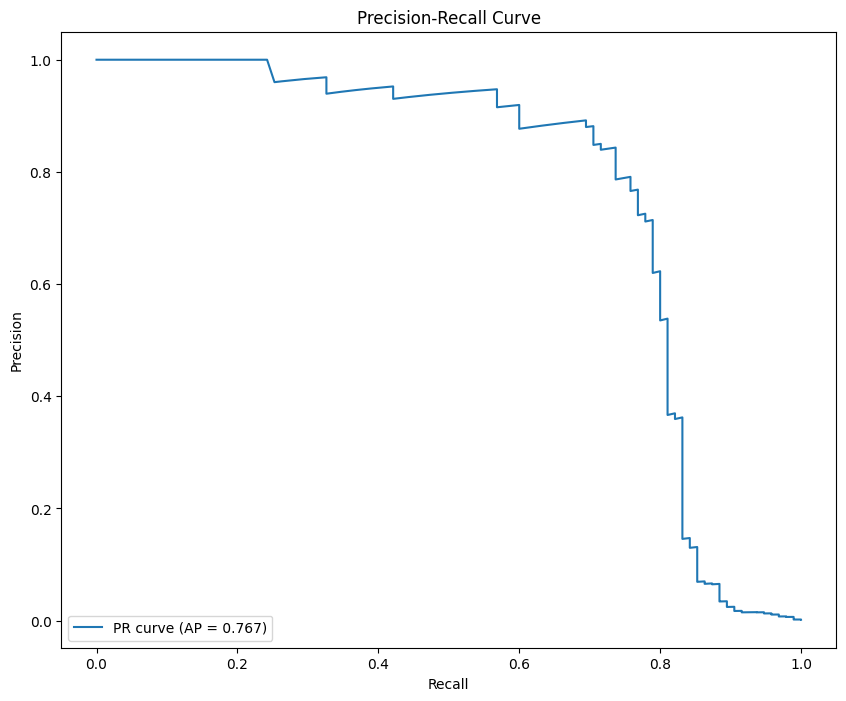

In [ ]:
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, label=f'PR curve (AP = {pr_auc:.3f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


10.2 Threshold Optimization

In [ ]:
thresholds = np.linspace(0.1, 0.9, 100)
f1_scores = []

for threshold in thresholds:
    y_pred_thresh = (y_prob >= threshold).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))

# threshold with best F1
best_threshold = thresholds[np.argmax(f1_scores)]
best_f1 = max(f1_scores)

print(f"Optimal threshold: {best_threshold:.3f}, F1 score: {best_f1:.3f}")

# Appliedd optimal threshold
y_pred_optimized = (y_prob >= best_threshold).astype(int)
print("Classification Report with Optimized Threshold:")
print(classification_report(y_test, y_pred_optimized))


Optimal threshold: 0.900, F1 score: 0.180
Classification Report with Optimized Threshold:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56651
           1       0.10      0.84      0.18        95

    accuracy                           0.99     56746
   macro avg       0.55      0.91      0.59     56746
weighted avg       1.00      0.99      0.99     56746



10.3 Cross validation

In [ ]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_recall = cross_val_score(rf_model, x_train, y_train, cv=skf, scoring='recall')
cv_precision = cross_val_score(rf_model, x_train, y_train, cv=skf, scoring='precision')
cv_f1 = cross_val_score(rf_model, x_train, y_train, cv=skf, scoring='f1')

print(f"Cross-validation Recall: {cv_recall.mean():.3f} ± {cv_recall.std():.3f}")
print(f"Cross-validation Precision: {cv_precision.mean():.3f} ± {cv_precision.std():.3f}")
print(f"Cross-validation F1: {cv_f1.mean():.3f} ± {cv_f1.std():.3f}")


Cross-validation Recall: 0.804 ± 0.062
Cross-validation Precision: 0.872 ± 0.025
Cross-validation F1: 0.835 ± 0.034


10.4 Model Comparision

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score


In [ ]:
models = {
    'Logistic Regression': log_reg,
    'Random Forest': rf_model,
    'XGBoost': best_xgb,
}

results = {}
optimal_threshold = 0.75

for name, model in models.items():
    y_prob = model.predict_proba(x_test)[:, 1]

    y_pred = (y_prob >= optimal_threshold).astype(int)

    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    avg_precision = average_precision_score(y_test, y_prob)

    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Avg Precision': avg_precision
    }

results_df = pd.DataFrame(results).T
print(results_df)


                     Precision    Recall  F1-Score  Avg Precision
Logistic Regression   0.118497  0.863158  0.208386       0.673070
Random Forest         0.843373  0.736842  0.786517       0.767094
XGBoost               0.056564  0.852632  0.106090       0.719678
